In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import pathlib

data_dir = "/content/drive/MyDrive/ekgs"

In [5]:
batch_size = 32
img_height = 300
img_width = 300

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 434 files belonging to 2 classes.
Using 348 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 434 files belonging to 2 classes.
Using 86 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['ekg_abnorm_png', 'ekg_norm_png']


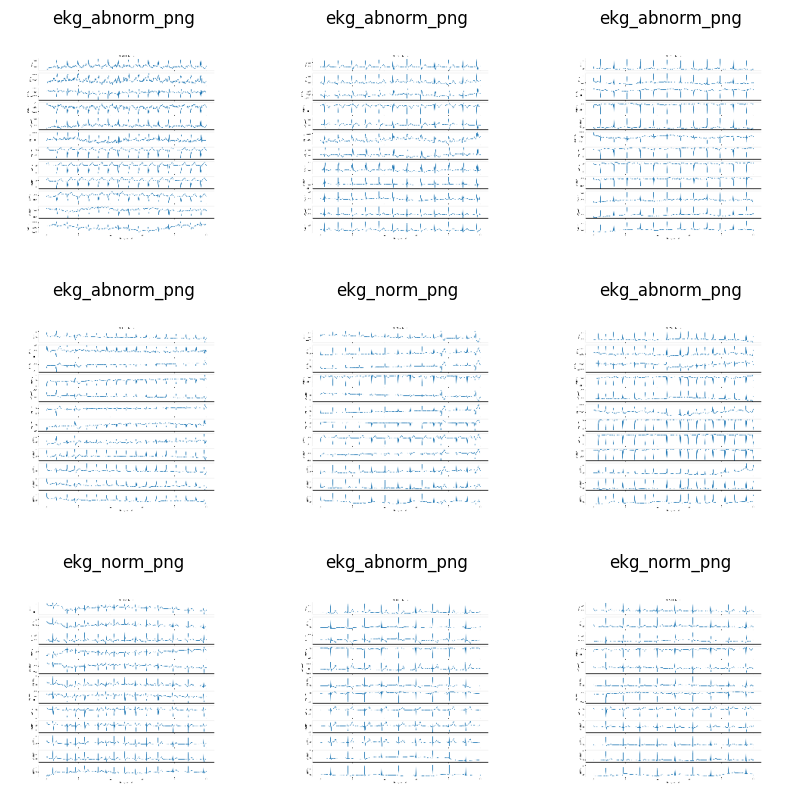

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
11/11 [==============================] - 60s 4s/step - loss: 1.7900 - accuracy: 0.4943 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 38s 3s/step - loss: 0.6924 - accuracy: 0.5029 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/10
11/11 [==============================] - 40s 4s/step - loss: 0.6888 - accuracy: 0.5575 - val_loss: 0.6854 - val_accuracy: 0.6395
Epoch 4/10
11/11 [==============================] - 39s 4s/step - loss: 0.6828 - accuracy: 0.6034 - val_loss: 0.6786 - val_accuracy: 0.6860
Epoch 5/10
11/11 [==============================] - 36s 3s/step - loss: 0.6726 - accuracy: 0.6149 - val_loss: 0.6670 - val_accuracy: 0.6628
Epoch 6/10
11/11 [==============================] - 36s 3s/step - loss: 0.6539 - accuracy: 0.6466 - val_loss: 0.6445 - val_accuracy: 0.6628
Epoch 7/10
11/11 [==============================] - 40s 4s/step - loss: 0.6246 - accuracy: 0.6494 - val_loss: 0.6154 - val_accuracy: 0.6628
Epoch 8/10
11/11 [==

In [20]:
model.save("keras_model.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9